In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Jcharis/Python-Machine-Learning/master/Classifying_Password_Strength_with_ML/cleanpasswordlist.csv")

In [5]:
df.head()

,Unnamed: 0,password,strength
0,0,kzde5577,1
1,1,kino3434,1
2,2,visi7k1yr,1
3,3,megzy123,1
4,4,lamborghin1,1


In [6]:
df = df[['password', 'strength']]

In [7]:
df.shape # EDA

(669425, 2)

In [8]:
df.describe()

,strength
count,669425.000000
mean,0.990217
std,0.507936
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [9]:
df.columns

Index(['password', 'strength'], dtype='object')

In [10]:
df.isnull().sum()

password    1
strength    0
dtype: int64

In [11]:
df['strength'].value_counts()

1    496650
0     89662
2     83113
Name: strength, dtype: int64

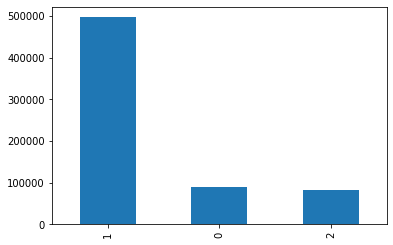

In [12]:
df['strength'].value_counts().plot(kind='bar')

In [13]:
df['password'].str.len().idxmax()

26951

In [14]:
df.iloc[26951]

password    In0LnUoff8wfayJGqzelyDqg4AMl9gBhgl3T2iZeONzh5g...
strength                                                    2
Name: 26951, dtype: object

In [15]:
df['password'].str.len().idxmin()

459739

In [16]:
df['password'] = df['password'].fillna('unknown')

In [17]:
X_features = df['password']
y_labels = df['strength']

In [18]:
df['password']

0             kzde5577
1             kino3434
2            visi7k1yr
3             megzy123
4          lamborghin1
              ...     
669420      10redtux10
669421       infrared1
669422    184520socram
669423       marken22a
669424        fxx4pw4g
Name: password, Length: 669425, dtype: object

In [19]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_features)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.3, random_state=21)

In [21]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [34]:
print("Accuracy:", logreg.score(X_test, y_test))

Accuracy: 0.7436114486027845


In [22]:
X_predict1 = ['password',
              'a8d7a9djd',
              'budirohmat',
              'thisispass#',
              'passwordku123',
              'ffffffffffff',
              '=quixc',
              '123456',
              '123546',
              'abcdef']

X_predict1 = vectorizer.transform(X_predict1)
y_predict1 = logreg.predict(X_predict1)
print(y_predict1)

[1 1 1 1 1 1 1 1 1 1]


In [28]:
import joblib

In [29]:
logreg_model = open("logreg_model.pkl", 'wb')
joblib.dump(logreg, logreg_model)
logreg_model.close()

In [30]:
passwd_cv = open("passwd_cvectorizer.pkl", 'wb')
joblib.dump(vectorizer, passwd_cv)
passwd_cv.close()

In [31]:
from sklearn.naive_bayes import MultinomialNB

In [32]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [33]:
print("Accuracy:", nb.score(X_test, y_test))

Accuracy: 0.7438853147967415


In [37]:
X_predict1 = ['password',
              'a8d7a9djd',
              'budirohmat',
              'thisispass#',
              'passwordku123',
              'ffffffffffff',
              '=quixc',
              '123456',
              '123546',
              'abcdef']

X_predict2 = vectorizer.transform(X_predict1)
y_predict2 = nb.predict(X_predict2)
print(y_predict2)

[1 1 1 1 1 1 1 1 1 1]


Source: [Link](https://github.com/Jcharis/Python-Machine-Learning/blob/master/Classifying_Password_Strength_with_ML/Classifying%20Password%20Strength_with_ML.ipynb)